<a href="https://colab.research.google.com/github/cpwan/OCR-API/blob/master/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/cpwan/OCR-API

Cloning into 'OCR-API'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 2), reused 13 (delta 1), pack-reused 0
Unpacking objects: 100% (17/17), done.


In [2]:
%cd OCR-API

/content/OCR-API


In [3]:
# !docker-compose -f docker-compose.dev.yml up --build

In [4]:
!apt-get update && apt-get install -y tesseract-ocr-eng
!pip3 install -r requirements.txt
# !python3 -m flask run --host=0.0.0.0 2>&1 
!pip3 install gunicorn
!gunicorn app:app -b 0.0.0.0:5000 -D

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graph

In [5]:
!python3 -m pytest

============================= test session starts ==============================
platform linux -- Python 3.7.10, pytest-3.6.4, py-1.10.0, pluggy-0.7.1
rootdir: /content/OCR-API, inifile:
plugins: typeguard-2.7.1
collected 2 items                                                              

test_ocr.py ..                                                           [100%]

=========================== 2 passed in 5.73 seconds ===========================


In [6]:
from getTestPair import *

In [7]:
image_data,expected_text,= getTestPairs('photo.tif')

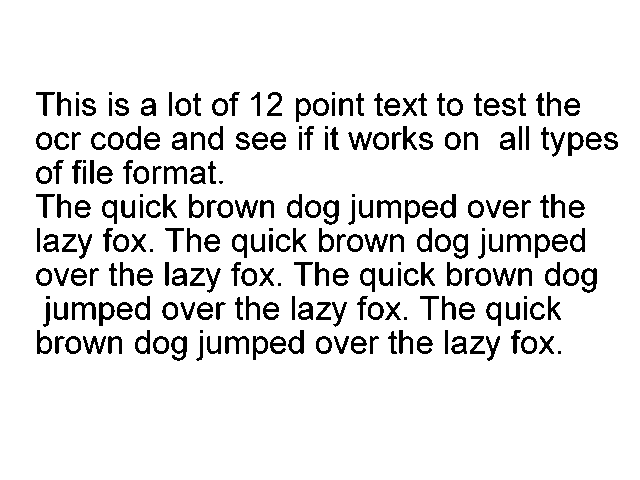

In [8]:
from PIL import Image
Image.open('photo.tif')

In [9]:
image_data # base64 image

'SUkqAAgAAAAOAP4ABAABAAAAAAAAAAABAwABAAAAgAIAAAEBAwABAAAA4AEAAAIBAwABAAAAAQAAAAMBAwABAAAAAQAAAAYBAwABAAAAAAAAABEBBAABAAAADAEAABUBAwABAAAAAQAAABYBAwABAAAA4AEAABcBBAABAAAAAJYAABoBBQABAAAAtgAAABsBBQABAAAAvgAAACgBAwABAAAAAgAAAEmGAQBGAAAAxgAAAAAAAACAhB4AECcAAICEHgAQJwAAOEJJTQPtAAAAAAAQAMgAAAABAAEAyAAAAAEAAThCSU0D8wAAAAAACAAAAAAAAAAAOEJJTScQAAAAAAAKAAEAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA

In [10]:
!curl -POST "http://localhost:5000/image-sync" -d '{"image_data": "SUkqAAgAAAAOAP4ABAABAAAAAAAAAAABAwABAAAAgAIAAAEBAwABAAAA4AEAAAIBAwABAAAAAQAAAAMBAwABAAAAAQAAAAYBAwABAAAAAAAAABEBBAABAAAADAEAABUBAwABAAAAAQAAABYBAwABAAAA4AEAABcBBAABAAAAAJYAABoBBQABAAAAtgAAABsBBQABAAAAvgAAACgBAwABAAAAAgAAAEmGAQBGAAAAxgAAAAAAAACAhB4AECcAAICEHgAQJwAAOEJJTQPtAAAAAAAQAMgAAAABAAEAyAAAAAEAAThCSU0D8wAAAAAACAAAAAAAAAAAOEJJTScQAAAAAAAKAAEAAAAAAAAAAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD//+eAAOAAAABwAAAAAAAABwAAAAAAAAAD8AAHAA/AAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAP//54AA4AAAAHAAAAAAAAAHAAAAwAAAAAfgAAcAP/AAAAAAAADgAAAYAAMAAAAAADAADAAAAABgAAAAAAYAAMHAAAAAAAAAAAAAAAAAAAAA///HgADgAAAAcAAAAAAAAAcAAAHAAAAAD+AADwB/+AAAAAAAAOAAADgABwAAAAAAcAAcAAAAAOAAAAAADgABwcAAAAAAAAAAAAAAAAAAAAAB4AeAAAAAAAAAAAAAAAAABwAAAcAAAAAOAAAfAPB4AAAAAAAAAAAAOAAHAAAAAABwABwAAAAA4AAAAAAOAAPBwAAAAAAAAAAAAAAAAAAAAAHgB4AAAAAAAAAAAAAAAAAHAAABwAAAAA4AAD8A4DwAAAAAAAAAAAA4AAcAAAAAAHAAHAAAAADgAAAAAA4AA8HAAAAAAAAAAAAAAAAAAAAAAeAHgAAAAAAAAAAAAAAAAAcAAAHAAAAADgAA/wDgHAAAAAAAAAAAADgABwAAAAAAcAAcAAAAAOAAAAAADgADwcAAAAAAAAAAAAAAAAAAAAAB4AeOAMA+AABgHwAAA/AABwB8B/gAA8A/wAHnAOAcAAw8AB4AYMPA/wAfwD4BwBn8AH+AeAAD+AfAA+A/gAfxx4AD4AAAAAAAAAAAAAAAAAHgB7+A4P+AAHB/wAAP/AAHAf8H+AAP+H/AAccAABwADv8A/4Dh7/D/AD/g/4Hge/4Af4P+AAP8H/AP+D/AD/HP4A/4AAAAAAAAAAAAAAAAAeAH/8Dh/8AAcP/gAB/+AAcD/4f4AD/8f8AABwAAHAAP/4H/4OH/8P8AP+H/wOBz/gB/h/+AA/w/+B/8P8AP8f/wH/wAAAAAAAAAAAAAAAAB4Afh4OHB4ABw4PAAPB4ABweHwcAAPD4OAAAHAAA4AA/Hg+Hg4fh4OAAHA8Hg8PBwABwPh4AA4Hg8HB4OAAPB+Pg8HgAAAAAAAAAAAAAAAAHgB8Dg48DgAHHgcAA4DgAHDwHBwAB4Dg4AAAcAAHgADwPDgPDh8Dg4AAcHgOB54HAAHA4DwADgcB48Dg4AA8HgeHgOAAAAAAAAAAAAAAAAAeAHgODjwMAAceBgADAPAAcOAeHAAHAPDgAABwAA8AAPAceAcOHgODgABwcAcDnAcAAcHgHAAODgDjwMDgADweA4cAcAAAAAAAAAAAAAAAAB4AeA4OHgAABw8AAAAA8ABw4A4cAA8AcOAAAHAAHwAA4B5wB44eA4OAAHBwBwP8BwABwcAeAA4OAOHgAOAAPBwDhwBwAAAAAAAAAAAAAAAAHgB4Dg4fwAAHD+AAAAfwAHDgDhwADgBw4AAAcAA+AADgDnADjh4Dg4AAcH//AfgHAAHBwA4ADg//8fwA4AA8HAOH//AAAAAAAAAAAAAAAAAeAHgODg/4AAcH/AAA//AAceAOHAAOAHDgAABwAHwAAOAOcAOOHgODgABw//8A8AcAAcHADgAOD//w/4DgADwcA4//8AAAAAAAAAAAAAAAAB4AeA4OA/4ABwH/AAP/8ABx4A4cAA4AcOAAAHAA8AAA4A5wA44eA4OAAHD//wDwBwABwcAOAA4P/+A/4OAAPBwDj//wAAAAAAAAAAAAAAAAHgB4Dg4AfwAHAD+AB/DwAHHgDhwADgBw4AAAcAHgAADgDnADjh4Dg4AAcPAAAfgHAAHBwA4ADg4AAAfw4AA8HAOPAAAAAAAAAAAAAAAAAAAeAHgODgAPAAcAB4AHAPAAcOAOHAAPAHDgAABwA8AAAOAecAeOHgODgABwcAAD+AcAAcHAHgAODgAAAPDgADwcA4cAAAAAAAAAAAAAAAAAAB4AeA4OOAcABxwDgAcA8ABw4A4cAAcA8OAAAHAHgAAA4Bx4Bw4eA4OAAHBwBgOcBwABweAcAA4OAMOAcOAAPBwDhwBgAAAAAAAAAAAAAAAAHgB4Dg48BwAHHgOABwHwAHDwHhwABwDg4AAAcA8AAADwHDgHDh4Dg4AAcHgPB54HAAHA4BwADg8A48Bw4AA8HAOHgPAAAAAAAAAAAAAAAAAeAHgODhwPAAcOB4AHg/AAcHg8HAAHweDgAABwDgAAAPg4PB8OHgODgABwPB4PDwcAAcDwfAAOB4HhwPDgADwcA4PB4AAAAAAAAAAAAAAAAB4AeA4OH/4ABw//AAf/8ABwf/gfgAP/wOAAAHAf/8AA//gf/g4eA4PwAHwf/h4HB8AB+H/4AA/D/8H/4PwAHxwDgf/gAAAAAAAAAAAAAAAAHgB4Dg4P/AAHB/4AA/5wAHAf8A+AAf+A4AAAcB//wADv8A/8Dh4DgfAAfg/8HAeH4AD4P/AAD8H/gP/A/AAfnAOA/8AAAAAAAAAAAAAAAAAOADAODgPwAAcB+AAA+HAAcA/AB4AAfgDgAABwH//AAOfAA/AODAOA8AA+B/A8A4PgAHgPwAAHwH4APwB8AA+cA4B/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAA4AAAAAAAAAAAAcB8AHAAAAAAAAAAAAHgAAAAAAAAAAAAAAAAABw4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAADgAAAAAAAAAAABwPwAcDAAAAAAAAAAAeAAAAAAAAAAAAAAAAAAHDgADAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAOAAAAAAAAAAAAHB/ABwcAAAAAAAAAAB4AAAAAAAAAAAAAAAAAAcOAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAA4AAAAAAAAAAAAAHAAADwAAAAAAAAAAHgAAAAAAAAAAAAAAAAABw4ABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAADgAAAAAAAAAAAAAcAAAPAAAAAAAAAAAeAAAAAAAAAAAAAAAAAAHDgAHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAOAAAAAAAAAAAAABwAAA8AAAAAAAAAAB4AAAAAAAAAAAAAAAAAAcOAAcAAAAAAAAAAAAAAAAAAAAAAPAAPAMcAAHgAfAAeOAPAAAB+AceAA44AAPgAPAAPgAAcf4AGH8AGAYBwHgBnHgcB8AAAPgDjwAAAAH4Bw4AH+YAYYcAB8AD4AAAAAAAAAAD/gD/g74AB/gH/AH+4D/gAAf+B3+Af7gAD/gD/gD/gABz/gAc/wA8DwHB/wO/eDwf8AAD/gO/wAAAB/4HDgAf7wDj38Af8A/4AAAAAAAAAA//Af/D/gAf/A/+A//gf/AAD/8H/8D/+AAf/Af/Af/AAHP+ABz/ABwPA8f/g/54eD/4AAf/A//gAAAP/wcOAB/nAOP/4D/4H/wAAAAAAAAADw+Dw8PgAB4eHw8Hx+DweAAeDwfDwPD4ABw8DweDweAAcHAAHDwAHA+Dh4fD4HjwODwAD4eD4eAAAB4PBw4ABwcBw/DweDwcHgAAAAAAAAAeA4eB48AAPA4cB4cB4cA4ABwHB4Hh4HgAOB4cA4eA4ABwcAAcPAAcH4OPAcPAeeB4HAAOA8PA8AAAHAcHDgAHB4HD4HhwHjwOAAAAAAAAABwDxwDjgAA4BjwDhwHhwBwAGAeHAOHAeAA4DBwBxwBwAHBwABw8AA4fg44B48B7wHgYAB4Bw4BwAAAYB4cOAAcDgcPAOOAOPAwAAAAAAAAAPAHHAAOAAHgAOAOOAOOAHAAAB4cA48A4AD4AOAHHAHAAcHAAHDwADh2HHgDjwH+APAAAHAHDgHAAAAAHhw4ABwODg8A44A4eAAAAAAAAAAA4AccAA4AAcAA4A84A4//8AAA/hwDjgDgAH8A//8f/8ABwcAAcPAAOGcccAOPAf4A/gAAcAeOAcAAAAD+HDgAHAcODwDj//x/AAAAAAAAAADgBzwADgABwADgDzgDj//wAB/+HAOOAOAAP+D//z//wAHBwABw8AAc5xxwA48B/wB/wABwB44BwAAAH/4cOAAcBx4PAPP//D/gAAAAAAAAAOAHPAAOAAHAAOAPOAOP//AAf/4cA44A4AAf8P//P//AAcHAAHDwABznOHADjwH/AB/wAHAHjgHAAAB//hw4ABwHHA8A8//4D/gAAAAAAAAA4Ac8AA4AAcAA4A84A44AAAD+HhwDjgDgAAP44AA8AAABwcAAcPAAHOM4cAOPAeeAA/gAcAeOAcAAAP4eHDgAHAOcDwDjgAAB/AAAAAAAAADwBxwADgAB4ADgDjgDjwAAAOAeHAOPAOAAADzwABwAAAHBwABw8AAMw7h4A48B44AAeABwBw4BwAAA4B4cOAAcA7wPAOOAAAA8AAAAAAAAAHAPHAOOAADgHOAOPAeHAGAA4B4cA4cA4ADgHHAGHAGAAcHAAHDwAA/D8DgHjwHhwcA4AHAHDgHAAADgHhw4ABwDuA8A44Aw4BwAAAAAAAAAcA4eA44AAOA88B4cB4eA8ADgPhwDhwHgAOAceA8eA8ABwcAAcPAAD8PwOAcPAeHh4DgAeA8OAcAAAOA+HDgAHAH4D4HjwDjwHAAAAAAAAAB8Hg8HjgAA8Dh4PB4Ph8HgAPB+HAODw+AA8Dh8Hg8HgAHBwABw8AAPwfA+Dw8B4ODgeAA8Hg4BwAAA8H4cOAAcAfgPw8HgeHA8AAAAAAAAAD/8D/8OAAB/+D/8D/+D/+AA//4cA4P/4AB/+D/+B/+AAcHAAHB8AAeB4B/+DwHg8P/wAB/+DgHAAAD//hw4AB+B8A//gP/wf/gAAAAAAAAAH/gH/g4AAD/wH/AH+4H/gAB/zhwDgf7gAD/wH/gD/wABwcAAcH4AB4HgD/wPAeB4f+AAD/gOAcAAAH/OHDgAD4DwD/8Af+A/8AAAAAAAAAAH4AH4DgAAD8AH4AHzgH8AAB8OHAOAfOAAD8AH8AH8AAHBwABwPgADgeAD8AYAwDgfgAAD8A4BwAAAHw4cOAAHgPAPPgAfgA/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4A8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgDwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcAPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwA8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+ADwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwAPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8AD9w8AAAAAPgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfgAf3DwAAAAB+AAAAAAAAAAAABgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD+AB+cPAAAAAP4AAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAHAA8AAAAA4AAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAcADwAAAADgAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgADwAPAAAAAOAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8A/wA/ww8A+AAD/AfAGOMPA8AD4D+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP+H/AD/nDwP+AAf8H/Ab87+P8B/4P8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/8f8AP+cPB/8AB/w/+B/j/9/wP/w/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPD4OAAPBw8PB4AA4Hh8HgPh+Hh4Pg4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4Dg4AA8HDw4DwADg8BweA8HwOHAeDgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAPDgADwcPHAHAAODgHhwDgOA4cA4OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8AcOAAPBw8cAcAA4OAOHAOA4DgADg4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgBw4AA8HDx//4ADg4A4cA4DgOAD+DgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAHDgADwcPH//gAOHgDhwDgOA4H/4OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AcOAAPBw8f/8AA4eAOHAOA4Dg//g4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgBw4AA8HDxwAAADh4A4cA4DgOH4ODgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPAHDgADwcPHAAAAODgDhwDgOA4cA4OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcA8OAAPBw8cAYAA4OAOHAOA4DjgHg4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwDg4AA8HDx4BwADg8B4cA4DgOOAeDgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHweDgADwcPDwPAAOB4PBwDgOA48H4OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP/wOAAPBw8H/4AA4H/4HAOA4Dh//g/HgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAf+A4AA8HDwP/AADgH/AcA4DgOD/uD8eAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfgDgABgcGAPwAAOAPwBwDgOA4H4cHwwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD//+eAAAAAAAAAAAAA4AAB4AAAcAAAAAAAAAAAAAAAAAHAAAAAAAAOAAAAAAAAAAAAAAAA8AAAAAAAAAAAAAAAHgAAAAAAAAAAAAAAAAAAAP//54AAAAAAAAAAAADgAAHgAABwAAAAAAAAAAAAAAAAAcAAAAAAAA4AAAAAAAAAAAAAAADwAAAAAAAAAAAAAAweAAAAAAAAAAAAAAAAAAAA///HgAAAAAAAAAAAAOAAAeAAAHAAAAAAAAAAAAAAAAABwAAAAAAADgAAAAAAAAAAAAAAAPAAAAAAAAAAAAAAHB4AAAAAAAAAAAAAAAAAAAAB4AeAAAAAAAAAAAAAAAAB4AAAcAAAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAA8AAAAAAAAAAAAAAcHgAAAAAAAAAAAAAAAAAAAAHgB4AAAAAAAAAAAAAAAAHgAABwAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAADwAAAAAAAAAAAAABweAAAAAAAAAAAAAAAAAAAAAeAHgAAAAAAAAAAAAAAAAeAAAHAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAPAAAAAAAAAAAAAAHB4AAAAAAAAAAAAAAAAAAAAB4AeOAA+AAAHjgwBgwA8B4HAAceAM4B8BgHAMYeAAAPHAHgAHDAAODAODDgPAceAA8AA48AADwDADgPgDHAB/HjgAPgAAAAAAAAAAAAAAAAHgB7+AP+AAB/uHgODgf8Hg8AB3+B34f8HAcBz3+AAD/cB/wB/eAA4cA4e/j+B3+AP+AP7wAB/wOAOD/gO+AP+e/gD/gAAAAAAAAAAAAAAAAeAH/8B/8AAP/4eA4OD/4eHgAH/8H/D/4cD4HP/4AAf/wf/gf/4ADhwDh//f8Hf8B/8B//AAP/w4B4f/A/4A/5//Af/AAAAAAAAAAAAAAAAB4Afh4PB4AB8fh4Dg4fDx48AAfh4fAeHxwPg4/DwAD4/B4fB4fgAOHAOH4/h4fj4PB4PD8AB8PBwHDweD4AAcH4eDweAAAAAAAAAAAAAAAAHgB8Dg4DwAHAeHgODhwHHngAB8Dh4DwHDg+Dj4HAAOA8PAcPA+AA4cA4eB8Dh4DhwDh4HwAHAeHAcOA8PAABwfA4OA8AAAAAAAAAAAAAAAAeAHgOHAHAAcB4eA4OPAce8AAHgHHgOAeOH4OPAcAA4Dw4B44B4ADhwDh4DgOHgPHAHHAPAA8A4cDxwBw4AAHB4DhwBwAAAAAAAAAAAAAAAB4AeA4cAcADgDh4Dg44AB/gAAeAceA4A44dxw8BwAHAHHgDjgHgAOHAOHgOA4cAc4AccA8ADgDw4OHAHDgAAcHgOHAHAAAAAAAAAAAAAAAAHgB4Dh//4AOAOHgODjgAH+AABwBx4DgDhx3HDwHAAcAccAOeAeAA4cA4eA4DhwBz//xwDwAOAHDg4f/+OAABweA4f/+AAAAAAAAAAAAAAAAeAHgOH//gA4A4eA4OOAAf8AAHAHHgeAOHGccPAcABwBxwA54B4ADhwDh4DgOHAHP//PAPAA4AcOHh//44AAHB4Dh//4AAAAAAAAAAAAAAAB4AeA4f/8ADgDh4Dg44AB/wAAcAceB4A4c4xw8BwAHAHHADngHgAOHAOHgOA4cAc//88A8ADgBwccH//DgAAcHgOH//AAAAAAAAAAAAAAAAHgB4DhwAAAOAOHgODjgAHngABwBx4HgDhzjuDwHAAcAccAOeAeAA4cA4eA4DhwBzgADwDwAOAHBxwcAAOAABweA4cAAAAAAAAAAAAAAAAAAeAHgOHAAAA4A4eA4OOAAeOAAHgHHgOAODuO4PAcABwBx4A44B4ADhwDh4DgOHAHPAAHAPAA4A8HuBwAA4AAHB4DhwAAAAAAAAAAAAAAAAAB4AeA4cAYABwDh4Dg48A54cAAeAceA4A4Ow7g8BwAHgPDgHjgHgAOHAOHgOA4eA8cAYcA8ADwDgO4HAGDgAAcHgOHAGAAAAAAAAAAAAAAAAHgB4Dh4BwAHAeDgeDhwHnh4AB4Dh4DwHg/B8DwHAAOA8OAcPA+AA4eB4eA4Dh4Dh4Dx4HwAHAOA/geAcOAABweA4eAcAAAAAAAAAAAAAAAAeAHgODwPAAeD4PD4OHg8eDgAHweHgHg8B8HwPAcAA8Hw+DweH4ADg4Ph4DgOHweHweDw/AAeD4B8A8Dw4AAHB4Dg8DwAAAAAAAAAAAAAAAB4AeA4H/4AA//g//g4P/x4PAAf/weAf/gHwfA8BwAB//B/+A//gAOD/+HgOA4f/wP/4H/8AA//AHwB/+DgAAfHgOB/+AAAAAAAAAAAAAAAAHgB4DgP/AAB/uB/uDgf+HgeAB3+B4Af8AeB4DwHAAD/cD/wB/cAA4H+4eA4Dh3+Af+AP7wAB/4AfAD/wOAAB+eA4D/wAAAAAAAAAAAAAAAAOADAOAPwAAB84B84OAfgMA4AHHwDAA/AA4DgGAcAAD5wD8ABxwADgPjgwDgOHPgAfwAfGAAB+AA4AD8A4AAD4wDgD8AAAAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAAOAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAcAA4AAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4DwADgAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4eAAeAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH/wAHwAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP+AA/AAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAABgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAAAAAAAAAAAfgAAAAAAAB///HAAAAAAAAAAAAAeAAAcAAAHAAAAAAAAAAAAAAAAABwAAAAAAADgAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAcAAAAAAAAAAD+AAAAAAAAH//8cAAAAAAAAAAAAB4AABwAAAcAAAAAAAAAAAAAAAAAHAAAAAAAAOAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAABwAAAAAAAAAAPwAAAAAAAAP//xwAAAAAAAAAAAAHgAAHAAABwAAAAAAAAAAAAAAAAAcAAAAAAAA4AAAAAAAAAAAAAAADgAAAAAAAAAAAAAAHAAAAAAAAAAA4AAAAAAAAAAeAHAAAAAAAAAAAAAAAAAcAAAHAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAcAAAAAAAAAADgAAAAAAAAAB4AcAAAAAAAAAAAAAAAABwAAAcAAAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAABwAAAAAAAAAAeAAAAAAAAAAHgBwAAAAAAAAAAAAAAAAHAAABwAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAHAHwB//MAMAH+AeAMAcAAAAeAHHgAPgAAB4wMA4MAfAcBwAHHgCOAeAYBgHGHAAADxwB4ADwwADBwDAw4DgGHgAPAAOOAAAAAAAAAAAAAAAcD/4H/84BwAf8H/A4DwAAAB4Ac/gD/gAAfzhwDh4H/BwPAAd/gd8H/DwPAc5/AAA/3A/4A/3AAOHAOHP4/gd/gH/AH+4AAAAAAAAAAAAAABwf/wf/zgHAB/x/+DwOAAAAHgB//Af/AAD/+HAOHg/+HB4AB//B/x/+HA8Dz/+AAH/8H/4H/8AA4cA4f/3/B//A//A//gAAAAAAAAAAAAAAHB4PAAOOA8AB4Hh8Hh4AAAAeAH4+DweAAeH4cA4eHh8cfAAH4+HwHh8cD4OPx8AA8Pw+Hg+PwADhwDh+P48H48Hw8Dw+AAAAAAAAAAAAAAAcPAcAB4cDgAHg8BwOPAAAAB4AeB4eA4ABwPhwDh4cBxz4AAeA4eA8Bxwfg48DwADgfDgPDgPAAOHAOHgeB4eB4cA4eB4AAAAAAAAAAAAAABw4BwAPBwOAAeDgHg94AAAAHgB4DhwBwAPAeHAOHjgHHfAAB4Dx4DgHjh+DjwHAAcA8eAcOA8AA4cA4eB4Dh4DhgDhwHgAAAAAAAAAAAAAAHAAHAB4Hh4AB4eAOB/AAAAAeAHAOHAHAA4B4cA4eOAAf4AAHAHHAeAOOHYcOAcABwDxwB5wBwADhwDhwHgOHAPOAHPAOAAAAAAAAAAAAAAAcAH8APAOHAAHhwA4D8AAAAB4AcA4f/8ADgDhwDh44AB/gAAcAccBwA44Zxw4BwAHAHHADnAHAAOHAOHAeA4cAc//84A4AAAAAAAAAAAAAABwH/wB4A4cAAeHADgPgAAAAHgBwDj//wAOAOHAOHjgAH+AABwBxwHADhznHDgHAAcAccAOcAcAA4cA4cB4DhwBz//zgDgAAAAAAAAAAAAAAHB//APABzwAB4cAOA+AAAAAeAHAOP//AA4A4cA4eOAAf8AAHAHHAcAOHOc4OAcABwBxwA5wBwADhwDhwHgOHAHP//OAOAAAAAAAAAAAAAAAcP4cA4AHOAAHhwA4D8AAAAB4AcA48AAADgDhwDh44AB54AAcAccBwA4c4zg4BwAHAHHADnAHAAOHAOHAeA4cAc4AA4A4AAAAAAAAAAAAAABw4BwHgAc4AAeHgDgfwAAAAHgBwDhwAAAOAOHAOHjgAHDgABwBxwHgDgzDuDgHAAcA8cAecAcAA4cA4cB4DhwDzgADwDgAAAAAAAAAAAAAAHHgHA8AA/AAB4OAeD3gAAAAeAHAOHAGAA4B4cA4eOAecPAAHgPHAOAeD8PwOAcABwDx4Bw4DwADhwHhwHgOHAOPAGHAOAAAAAAAAAAAAAAAceA8HgAD8AAHg4BwOPAAAAB4AcA4eA8ABwHh4Hh48BxweAAeA4cA4BwPw/A4BwADgPDgHDgPAAOHAeHAeA4eA4cA4cB4AAAAAAAAAAAAAABw4Hw8AAPwAAeD4PB4cAAAAHgBwDg8HgAHg+Dg+Hh4PHA4AB8HhwD4PA/B8DgHAAPB8PB8Hh8AA4eD4cB4Dh8HB8Hg8PgAAAAAAAAAAAAAAHD//j//geAAB4H/4PB4OAAAeAHAOB/+AAP/4P/4eD/4cDwAH/8HAH/4B4HgOAcAAf/wf/gf/wADg//hwHgOH/8D/8D/+AAAAAAAAAAAAAAAcH/OP/+B4AAHgP/B4Dw4AAB4AcA4D/wAAf7gf7h4H/BwHAAd/gcAP/AHgeA4BwAA/3A/8A/3AAOD/OHAeA4d/gH/gH+4AAAAAAAAAAAAAABwPw4//4HgAAMAPwHAHDgAAHABwDgH8AAAfOA+ODAHwHAOABz4BwAPwAOB4DgHAAB8cA/AA8cAA4D44cAwDhz4AH4AHzgAAAAAAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwADgAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgHAAOAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPAAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOA8AB4AAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4AAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+PgAHAAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfgAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/8AD8AAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8AAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/gAPgAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAAYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAHgAAAAAAAAAAPgAAAAAAAA///ngAAAAAAAAAAAAOAAAeAAAHAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMDgAAAAAAeAAAAAAAAAAB+AAAAAAAAD//+eAAAAAAAAAAAAA4AAB4AAAcAAAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwOAAAAAAB4AAAAAAAAAAP4AAAAAAAAP//x4AAAAAAAAAAAADgAAHgAABwAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHA4AAAAAAHgAAAAAAAAAA4AAAAAAAAAAeAHgAAAAAAAAAAAAAAAAeAAAHAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcDgAAAAAAeAAAAAAAAAADgAAAAAAAAAB4AeAAAAAAAAAAAAAAAAB4AAAcAAAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwOAAAAAAB4AAAAAAAAAAOAAAAAAAAAAHgB4AAAAAAAAAAAAAAAAHgAABwAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAA8A4AYB4ARwAfw48AB4AAHgH4B//MAMAD/AfAOAMAAAAeAHjgAPgAAB44MAYMAPAeBwAHHgDOAfAYBwDGHgAADxwB4ABwwAAAAAAAAAAAAAP+DgDg/4DvgB/jv8A/4AAeB/4H/+4B4Af8H/A8DwAAAB4Ae/gD/gAAf7h4Dg4H/B4PAAd/gd+H/BwHAc9/gAA/3Af8Af3gAAAAAAAAAAAAD/8PAOH/4P+AH+P/4H/4AB4P/wf/zgHAB/w/+BwOAAAAHgB//Af/AAD/+HgODg/+Hh4AB//B/w/+HA+Bz/+AAH/8H/4H/+AAAAAAAAAAAAAPD4cBw+Hg+AAHA+Hg+HgAHh4PAAPHAcAA4Hh8Hh4AAAAeAH4eDweAAfH4eA4OHw8ePAAH4eHwHh8cD4OPw8AA+PweHweH4AAAAAAAAAAAAB4DhwHDgHDwAAcDwODgHAAeHAcAB4cDwADg8BwPPAAAAB4AfA4OA8ABwHh4Dg4cBx54AAfA4eA8Bw4Pg4+BwADgPDwHDwPgAAAAAAAAAAAAHAPDgcMAcPAABwOA8MAcAB4YB4APBwOAAODgHgc4AAAAHgB4DhwBwAHAeHgODjwHHvAAB4Bx4DgHjh+DjwHAAOA8OAeOAeAAAAAAAAAAAAA8AcODhwA44AAHA4DxwA4AHgAHgB4Dg4AA4OAOB/gAAAAeAHgOHAHAA4A4eA4OOAAf4AAHgHHgOAOOHccPAcABwBx4A44B4AAAAAAAAAAAADgBw4OH//jgAAcDgPH//gAeAD+APAOHAADg4A4D8AAAAB4AeA4f/+ADgDh4Dg44AB/gAAcAceA4A4cdxw8BwAHAHHADngHgAAAAAAAAAAAAOAHBw4f/+OAABwOA8f/+AB4H/4A4A8cAAOHgDgHgAAAAHgB4Dh//4AOAOHgODjgAH/AABwBx4HgDhxnHDwHAAcAccAOeAeAAAAAAAAAAAAA4AcHHB//44AAHA4Dx//4AHh//gHgBxwAA4eAOAeAAAAAeAHgOH//AA4A4eA4OOAAf8AAHAHHgeAOHOMcPAcABwBxwA54B4AAAAAAAAAAAADgBwccHAADgAAcDgPHAAAAeP4eA8AHOAADh4A4D8AAAAB4AeA4cAAADgDh4Dg44AB54AAcAceB4A4c47g8BwAHAHHADngHgAAAAAAAAAAAAPAHA5wcAAOAABwOA8cAAAB44B4HgAe4AAODgDgfwAAAAHgB4DhwAAAOAOHgODjgAHjgAB4Bx4DgDg7juDwHAAcAceAOOAeAAAAAAAAAAAAAcA8DuB4Aw4AAHA4Dx4AwAHjgHg8AA7gAA4OAOBzgAAAAeAHgOHAGAAcA4eA4OPAOeHAAHgHHgOAODsO4PAcAB4Dw4B44B4AAAAAAAAAAAABwDgP4DgHDgAAcDgPDgHAAeOA+HgAD8AADg8B4PPAAAAB4AeA4eAcABwHg4Hg4cB54eAAeA4eA8B4PwfA8BwADgPDgHDwPgAAAAAAAAAAAAHweAfgPg8OAABwOA8Pg8AB48H48AAHwAAOB4PB4eAAAAHgB4Dg8DwAHg+Dw+Dh4PHg4AB8Hh4B4PAfB8DwHAAPB8Pg8Hh+AAAAAAAAAAAAAP/wB8Af/g4AAH44Dwf/gAHj//j//gfAAA4H/4PA4OAAAeAHgOB/+AAP/4P/4OD/8eDwAH/8HgH/4B8HwPAcAAf/wf/gP/4AAAAAAAAAAAAAf+ADwA/8DgAAfjgPA/8AAeH/OP/+B4AADgH/A4Dw4AAB4AeA4D/wAAf7gf7g4H/h4HgAd/geAH/AHgeA8BwAA/3A/8Af3AAAAAAAAAAAAAAfgAPAA/AOAAA+OAYA/AAAwHw4//4DgAAOAPwHgHDgAADgAwDgD8AAAfOAfODgH4DAOABx8AwAPwAOA4BgHAAA+cA/AAccAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOA8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+HgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfgAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8AAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAADgAAAAAAOAAAAAAAAAAA/AAAAAAAAD//+OAAAAAAAAAAAAA4AAA4AAAAAAAAAAAAAAAAAAAAAA8AAAAAAAAAAAAAAABwAAAAAAAAAAAAAAwOAAAAAAA4AAAAAAAAAAH4AAAAAAAAP//44AAAAAAAAAAAADgAADgAAAAAAAAAAAAAAAAAAAAADwAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAHA4AAAAAADgAAAAAAAAAA/gAAAAAAAA///jgAAAAAAAAAAAAOAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAcDgAAAAAAOAAAAAAAAAADgAAAAAAAAAA4AOAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAABwOAAAAAAA4AAAAAAAAAAOAAAAAAAAAADgA4AAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAHA4AAAAAADgAAAAAAAAAA4AAAAAAAAAAOADgAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAGDAGDjwPAMOAA+AA8cAAD4BgBgHgBnAB/jjwAHgAAOAfgD/84A4AP8B8A4AwAAAA4AOPAAeAAADhgwBg4A8A4HAAAAAAAAAAAAAAAAAAAAA8OA8O/z/B7+AP+AP9wAA/4PAOB/wO/AH+O/wB/wAA4H/gf/7gDgB/wf8DwHAAAADgA7/AP+AAB/uDgPDgP8Dg8AAAAAAAAAAAAAAAAAAAADw4Dw//f+H/8B/8B//AAH/wcA4P/g/4Af4//gP/gADg//B//vAcAH/D/4HA8AAAAOAD/+B/+AAP/4OA8OD/4OHgAAAAAAAAAAAAAAAAAAAAPDgPD4fh4fh4PB4Pj8AA8PhwDh4PD4AAcD4eB4PAAOHg8AA8cBwADgfDwOHgAAAA4APh4Ph4AA8Pg4Dw4PDw48AAAAAAAAAAAAAAAAAAAAA8OA8PA8Dh8Dw4Dw4DwAHgOHgcOAcPAABwPA8OAcAA4cB4AHhwHAAOBwHg8cAAAADgA8Dg4BwAHgeDgPDh4HDngAAAAAAAAAAAAAAAAAAAADw4Dw4DwPHgHHAHDgPAAcA8OBw4A48AAHA4Bw4A4ADhwHgA8Dg4AA4PAOB7wAAAAOADgPDAHAAcA4OA8OHAMO8AAAAAAAAAAAAAAAAAAAAAPDgPDgOA8eAccAccAcABwBw4HHADjwAAcDgHHADgAOAAeAHgODgADg4A4D+AAAAA4AOA8cAOABwDg4Dw48AA/gAAAAAAAAAAAAAAAAAAAAA8OA8OA4Dx4Bx//5wBwAHAHBw4f/+PAABwOAcf/+AA4AP4AeA4OAAODgDwPwAAAADgA4Dx//4APAODgPDjgAD+AAAAAAAAAAAAAAAAAAAAADw4Dw4DgPHgHn//nAHAA8AcHDh//48AAHA4Bx//4ADgf/gDwBxwAA4OAPAeAAAAAOADgPH//gA4A4OA8OOAAP8AAAAAAAAAAAAAAAAAAAAAPDgPDgOA8eAef/8cAcADwBwceH//jwAAcDgHH//gAOD/+AeAHHAADg4A8B4AAAAA4AOA8f/+ADgDg4Dw44AA9wAAAAAAAAAAAAAAAAAAAAA8OA8OA4Dx4BxwABwBwAPAHA5wcAAPAABwOAccAAAA4fh4DwAccAAODgDwPwAAAADgA4DxwAAAPAODgPDjgADngAAAAAAAAAAAAAAAAAAAADw4Dw4DgPHgHHAAHAHAAcAcDnB4AA8AAHA4Bx4AAADjwHgeAA7gAA4OAOB/gAAAAOADgPHAAAAcA4OA8OPAAOPAAAAAAAAAAAAAAAAAAAAAPDgPDgOA8eAccAYeA8ABwBwO8DgDDwAAcDgHDgDAAOOAeDwADuAADg4A4HOAAAAA4AOA8eAMABwDg4Dw4cA44cAAAAAAAAAAAAAAAAAAAAA8OA8OA4Dx8Dx4Bw4DwAHgPAfgPAePAABwOAcPAeAA44B4OAAP4AAODwHg88AAAADgA4Dw4BwAHgeDgPDhwHjh4AAAAAAAAAAAAAAAAAAAADw8Hw4DgPH4eDwPDwfAAPB4B+A+Dw8AAHA4Bw+DwADjwfh4AAfAAA4Hg8Hh4AAAAOADgPD4PAAPD4PB8OHgcODwAAAAAAAAAAAAAAAAAAAAPD//DgOA8f/wH/4H/8AA//AH4B//DwAAfjgHB//AAOH/+P/+B8AADgP/wcDg4AAA4AOA8H/4AA//g//w4P/w4HAAAAAAAAAAAAAAAAAAAAA8H+8OA4Dx/+AP/AP9wAA/4APAD/wPAAA+OAcD/wAA4f+4//4DwAAOAf8DwHDgAADgA4DwP/AAB/uB/vDgf+DgeAAAAAAAAAAAAAAAAAAAADwHxg4DgGHnwAPwAPnAAB+AA8AD+AYAAB44BwD+AADgfhj//gOAAA4AfgeAeOAAAOADgGAPwAAB84B8YOAfgOA4AAAAAAAAAAAAAAAAAAAAPAAAAAAAAeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAB4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHgAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAHgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwAAAAAAAAAAAAAAAAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH4AAAAAAAB4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+AAAAAAAAAAAAAAAAAAAAAAAAAAOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfAAAAAAAAHgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwAAAAAAAAAAAAAAAAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAAAABwAAAAAAADgAAAAAAAAAAAAAAAPAAAAAAAAAAAAAAAB4AAAAAAHAAAAAAAAAAAfgAAAAAAAAAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAHAAAAAAAAOAAAAAAAAAAAAAAAA8AAAAAAAAAAAAAAMHgAAAAAAcAAAAAAAAAAD+AAAAAAAAAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAcAAAAAAAA4AAAAAAAAAAAAAAADwAAAAAAAAAAAAABweAAAAAABwAAAAAAAAAAPwAAAAAAAAAAAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAPAAAAAAAAAAAAAAHB4AAAAAAHAAAAAAAAAAA4AAAAAAAAAAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAA8AAAAAAAAAAAAAAcHgAAAAAAcAAAAAAAAAADgAAAAAAAAAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAADwAAAAAAAAAAAAABweAAAAAABwAAAAAAAAAAeAAAAAAAAAAAAAAAAAAAAAAAAAAHHgDOAfAYBwDGHgAADxwB4ABwwADgwDgw4DwHHgAPAAOPAAA8AwA4D4AxwAfx44AD4AAHAHwB//MAMAH+AeAMAcAAAAAAAAAAAAAAAAAAAAd/gd+H/BwHAc9/gAA/3Af8Af3gAOHAOHv4/gd/gD/gD+8AAf8DgDg/4DvgD/nv4A/4AAcD/4H/84BwAf8H/A4DwAAAAAAAAAAAAAAAAAAAB//B/w/+HA+Bz/+AAH/8H/4H/+AA4cA4f/3/B3/Af/Af/wAD/8OAeH/wP+AP+f/wH/wABwf/wf/zgHAB/x/+DwOAAAAAAAAAAAAAAAAAAAAH4eHwHh8cD4OPw8AA+PweHweH4ADhwDh+P4eH4+DweDw/AAfDwcBw8Hg+AAHB+Hg8HgAHB4PAAOOA8AB4Hh8Hh4AAAAAAAAAAAAAAAAAAAAfA4eA8Bw4Pg4+BwADgPDwHDwPgAOHAOHgfA4eA4cA4eB8ABwHhwHDgPDwAAcHwODgPAAcPAcAB4cDgAHg8BwOPAAAAAAAAAAAAAAAAAAAAB4Bx4DgHjh+DjwHAAOA8OAeOAeAA4cA4eA4Dh4DxwBxwDwAPAOHA8cAcOAABweA4cAcABw4BwAPBwOAAeDgHg94AAAAAAAAAAAAAAAAAAAAHgHHgOAOOHccPAcABwBx4A44B4ADhwDh4DgOHAHOAHHAPAA4A8ODhwBw4AAHB4DhwBwAHAAHAB4Hh4AB4eAOB/AAAAAAAAAAAAAAAAAAAAAcAceA4A4cdxw8BwAHAHHADngHgAOHAOHgOA4cAc//8cA8ADgBw4OH//jgAAcHgOH//gAcAH8APAOHAAHhwA4D8AAAAAAAAAAAAAAAAAAAABwBx4HgDhxnHDwHAAcAccAOeAeAA4cA4eA4DhwBz//zwDwAOAHDh4f/+OAABweA4f/+ABwH/wB4A4cAAeHADgPgAAAAAAAAAAAAAAAAAAAAHAHHgeAOHOMcPAcABwBxwA54B4ADhwDh4DgOHAHP//PAPAA4AcHHB//w4AAHB4Dh//wAHB//APABzwAB4cAOA+AAAAAAAAAAAAAAAAAAAAAcAceB4A4c47g8BwAHAHHADngHgAOHAOHgOA4cAc4AA8A8ADgBwccHAADgAAcHgOHAAAAcP4cA4AHOAAHhwA4D8AAAAAAAAAAAAAAAAAAAAB4Bx4DgDg7juDwHAAcAceAOOAeAA4cA4eA4DhwBzwABwDwAOAPB7gcAAOAABweA4cAAABw4BwHgAc4AAeHgDgfwAAAAAAAAAAAAAAAAAAAAHgHHgOAODsO4PAcAB4Dw4B44B4ADhwDh4DgOHgPHAGHAPAA8A4DuBwBg4AAHB4DhwBgAHHgHA8AA/AAB4OAeD3gAAAAAAAAAAAAAAAAAAAAeA4eA8B4PwfA8BwADgPDgHDwPgAOHgeHgOA4eA4eA8eB8ABwDgP4HgHDgAAcHgOHgHAAceA8HgAD8AAHg4BwOPAAAAAAAAAAAAAAAAAAAAB8Hh4B4PAfB8DwHAAPB8Pg8Hh+AA4OD4eA4Dh8Hh8Hg8PwAHg+AfAPA8OAABweA4PA8ABw4Hw8AAPwAAeD4PB4cAAAAAAAAAAAAAAAAAAAAH/8HgH/4B8HwPAcAAf/wf/gP/4ADg//h4DgOH/8D/+B//AAP/wB8Af/g4AAHx4Dgf/gAHD//j//geAAB4H/4PB4OAAAAAAAAAAAAAAAAAAAd/geAH/AHgeA8BwAA/3A/8Af3AAOB/uHgOA4d/gH/gD+8AAf+AHwA/8DgAAfngOA/8AAcH/OP/+B4AAHgP/B4Dw4AAAAAAAAAAAAAAAAAABx8AwAPwAOA4BgHAAA+cA/AAccAA4D44MA4Dhz4AH8AHxgAAfgAOAA/AOAAA+MA4A/AABwPw4//4HgAAMAPwHAHDgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwADgAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADgHAAOAAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOA8AA4AAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+HgAHgAAAAAAAHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/8AB8AAAAAAAAcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/gAPwAAAAAAABwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwAAYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA=="}'

{"text":"This is a lot of 12 point text to test the\nocr code and see if it works on all types\nof file format.\n\nThe quick brown dog jumped over the\nlazy fox. The quick brown dog jumped\nover the lazy fox. The quick brown dog\njumped over the lazy fox. The quick\nbrown dog jumped over the lazy fox.\n\f"}
